In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hdf5plugin
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
import dill


In [9]:
conda install mmariotti::extend_orfs_pyranges

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions


Note: you may need to restart the kernel to use updated packages.


In [3]:
on = sc.read_h5ad("/Users/cristalvillalba/Downloads/signac/on_annotation.h5ad")
on.obs['group'] = 'on'


In [4]:
on

AnnData object with n_obs × n_vars = 555545 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'DF.classifications', 'donor', 'Age', 'Gender', 'Postmortem time (hr)', 'Ethnicity', 'sampleid', 'leiden', 'annotate', 'group'
    uns: 'annotate_colors'
    obsm: 'X_scVI', 'X_umap'

In [7]:
on.obs.rename(columns={'Ethnicity': 'ethnicity'}, inplace=True)
on.obs.rename(columns={'Gender': 'gender'}, inplace=True)
on.obs.rename(columns={'Age': 'age'}, inplace=True)

old_string = 'M'
new_string = 'male'
 
old_string = 'F'

on.obs['group'] = 'on'

on.obs.rename(columns={'Ethnicity': 'ethnicity'}, inplace=True)

on.obs.rename(columns={'Gender': 'gender'}, inplace=True)

on.obs.rename(columns={'Age': 'age'}, inplace=True)



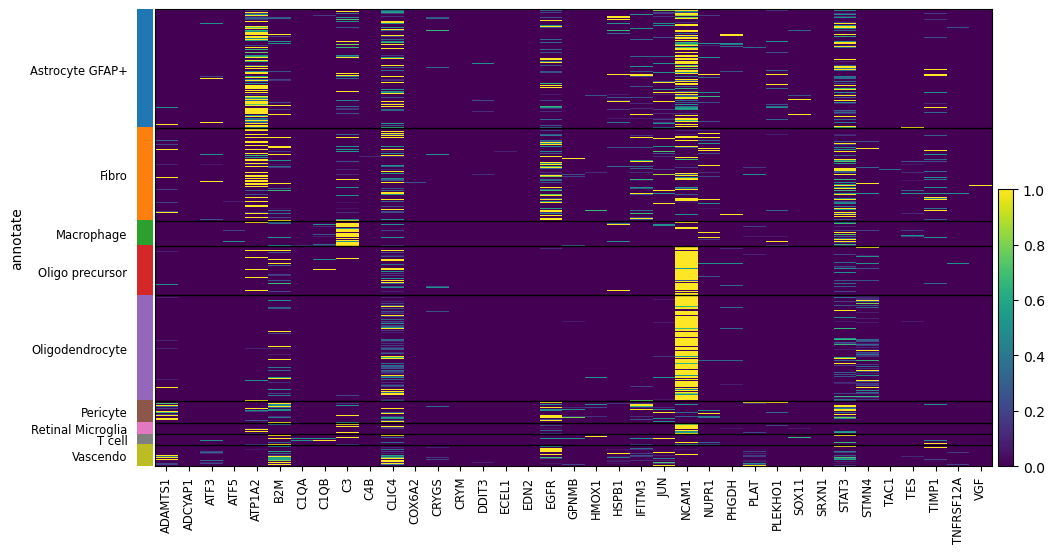

In [29]:
sc.pl.heatmap(on, groupby = 'annotate', standard_scale = 'obs', var_names = ['ADAMTS1','ADCYAP1','ATF3','ATF5','ATP1A2','B2M','C1QA','C1QB','C3','C4B','CLIC4','COX6A2','CRYGS','CRYM','DDIT3','ECEL1','EDN2','EGFR','GPNMB','HMOX1','HSPB1','IFITM3','JUN','NCAM1','NUPR1','PHGDH','PLAT','PLEKHO1','SOX11','SRXN1','STAT3','STMN4','TAC1','TES','TIMP1','TNFRSF12A','VGF'])

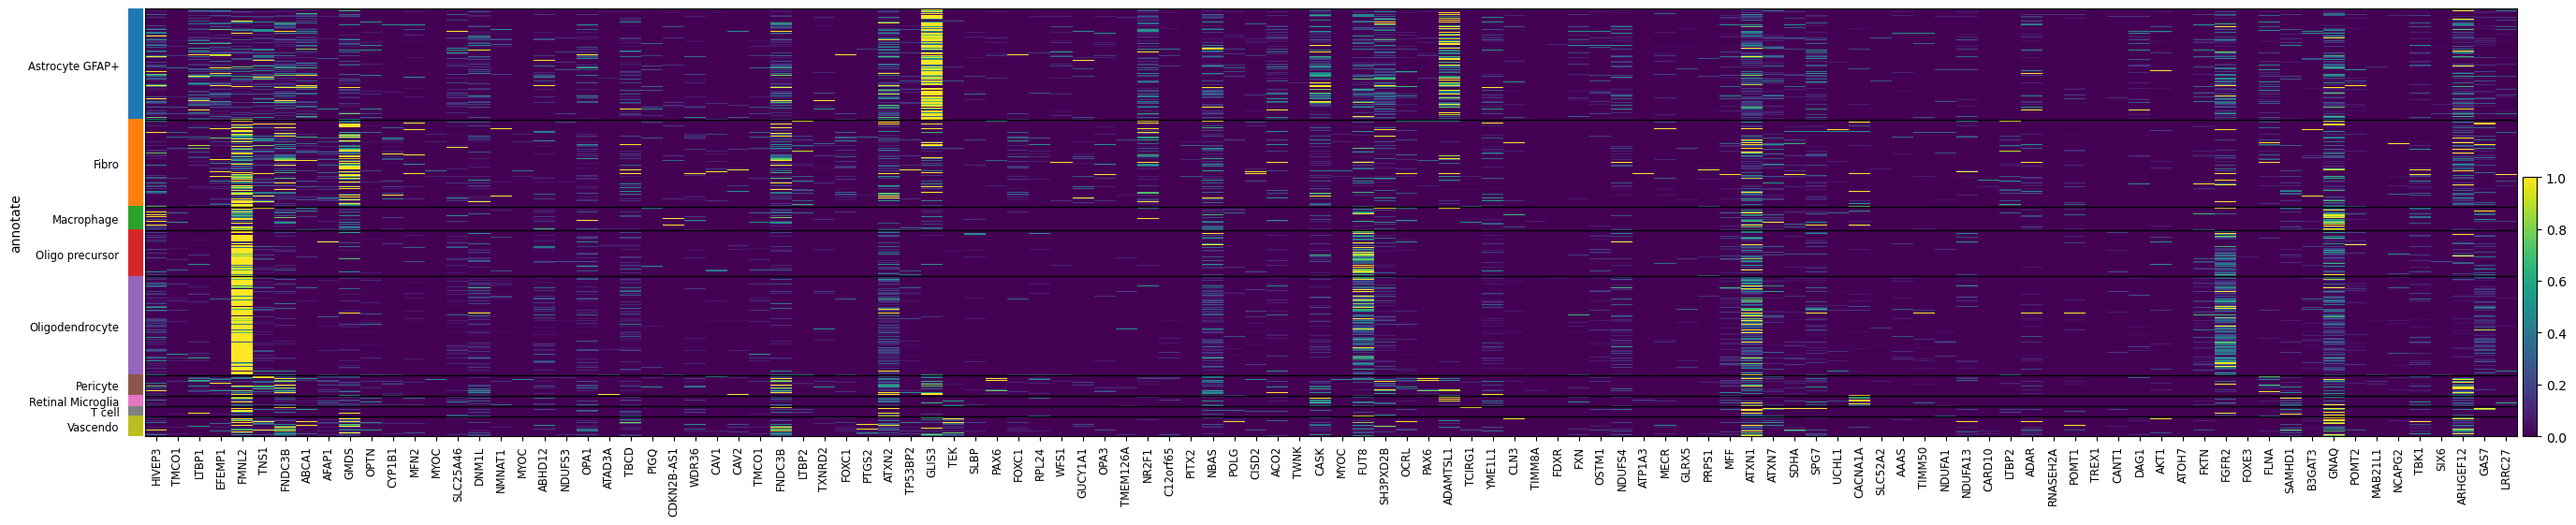

In [33]:
sc.pl.heatmap(on, groupby = 'annotate', standard_scale = 'obs', var_names =['HIVEP3','TMCO1','LTBP1','EFEMP1','FMNL2','TNS1','FNDC3B','ABCA1','AFAP1','GMDS','OPTN','CYP1B1','MFN2','MYOC','SLC25A46','DNM1L','NMNAT1','MYOC','ABHD12','NDUFS3','OPA1','ATAD3A','TBCD','PIGQ','CDKN2B-AS1','WDR36','CAV1','CAV2','TMCO1','FNDC3B','LTBP2','TXNRD2','FOXC1','PTGS2','ATXN2','TP53BP2','GLIS3','TEK','SLBP','PAX6','FOXC1','RPL24','WFS1','GUCY1A1','OPA3','TMEM126A','NR2F1','C12orf65','PITX2','NBAS','POLG','CISD2','ACO2','TWNK','CASK','MYOC','FUT8','SH3PXD2B','OCRL','PAX6','ADAMTSL1','TCIRG1','YME1L1','CLN3','TIMM8A','FDXR','FXN','OSTM1','NDUFS4','ATP1A3','MECR','GLRX5','PRPS1','MFF','ATXN1','ATXN7','SDHA','SPG7','UCHL1','CACNA1A','SLC52A2','AAAS','TIMM50','NDUFA1','NDUFA13','CARD10','LTBP2','ADAR','RNASEH2A','POMT1','TREX1','CANT1','DAG1','AKT1','ATOH7','FKTN','FGFR2','FOXE3','FLNA','SAMHD1','B3GAT3','GNAQ','POMT2','MAB21L1','NCAPG2','TBK1','SIX6','ARHGEF12','GAS7','LRRC27'], show_gene_labels=True)

In [21]:
on

AnnData object with n_obs × n_vars = 555545 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'DF.classifications', 'donor', 'age', 'gender', 'Postmortem time (hr)', 'ethnicity', 'sampleid', 'leiden', 'annotate', 'group'
    uns: 'annotate_colors', 'gender_colors', 'ethnicity_colors'
    obsm: 'X_scVI', 'X_umap'

/Users/cristalvillalba/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/cristalvillalba/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/cristalvillalba/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWa

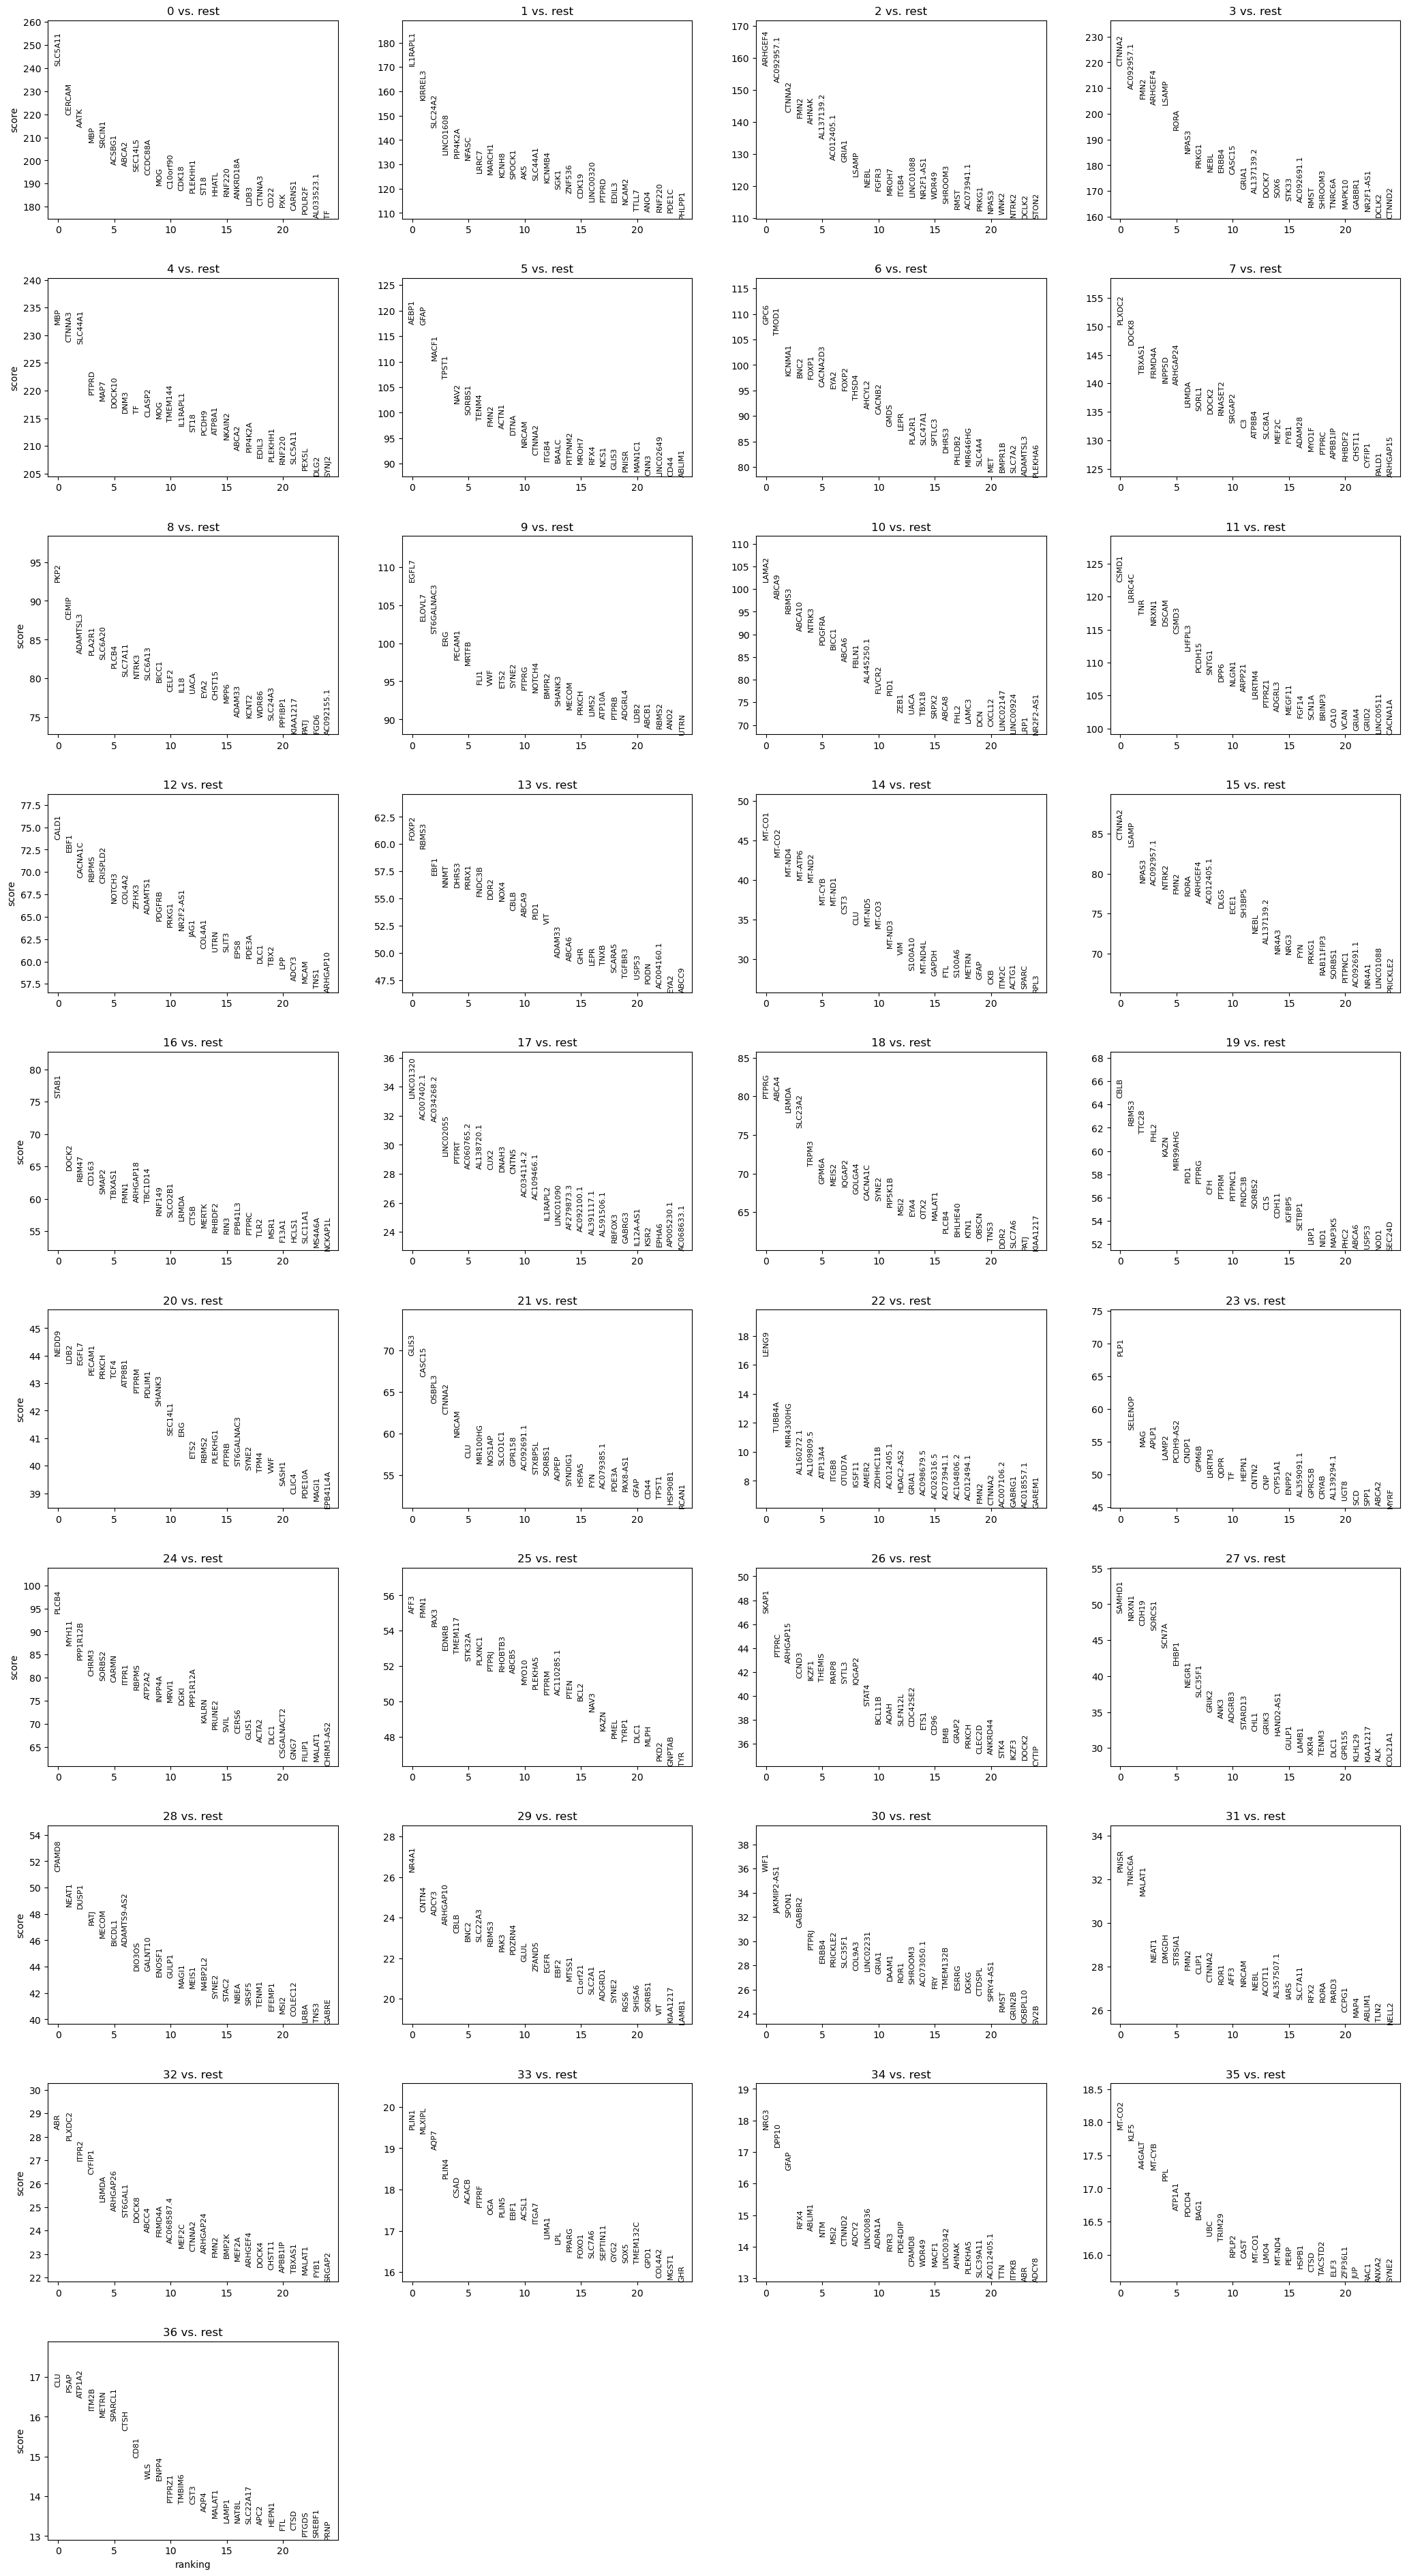

NameError: name 'adata' is not defined

In [37]:
sc.tl.rank_genes_groups(on, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(on, n_genes=25, sharey=False, key = "t-test")

# results are stored in the adata.uns["t-test"] slot
adata

In [38]:
# Perform renormalization
sc.pp.normalize_total(on, target_sum=1e4)  # normalize to 10,000 counts per cell

In [39]:
# Perform log transformation
sc.pp.log1p(on)  # log transform the data, adding 1 to avoid taking the log of zero

/Users/cristalvillalba/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/cristalvillalba/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/cristalvillalba/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWa

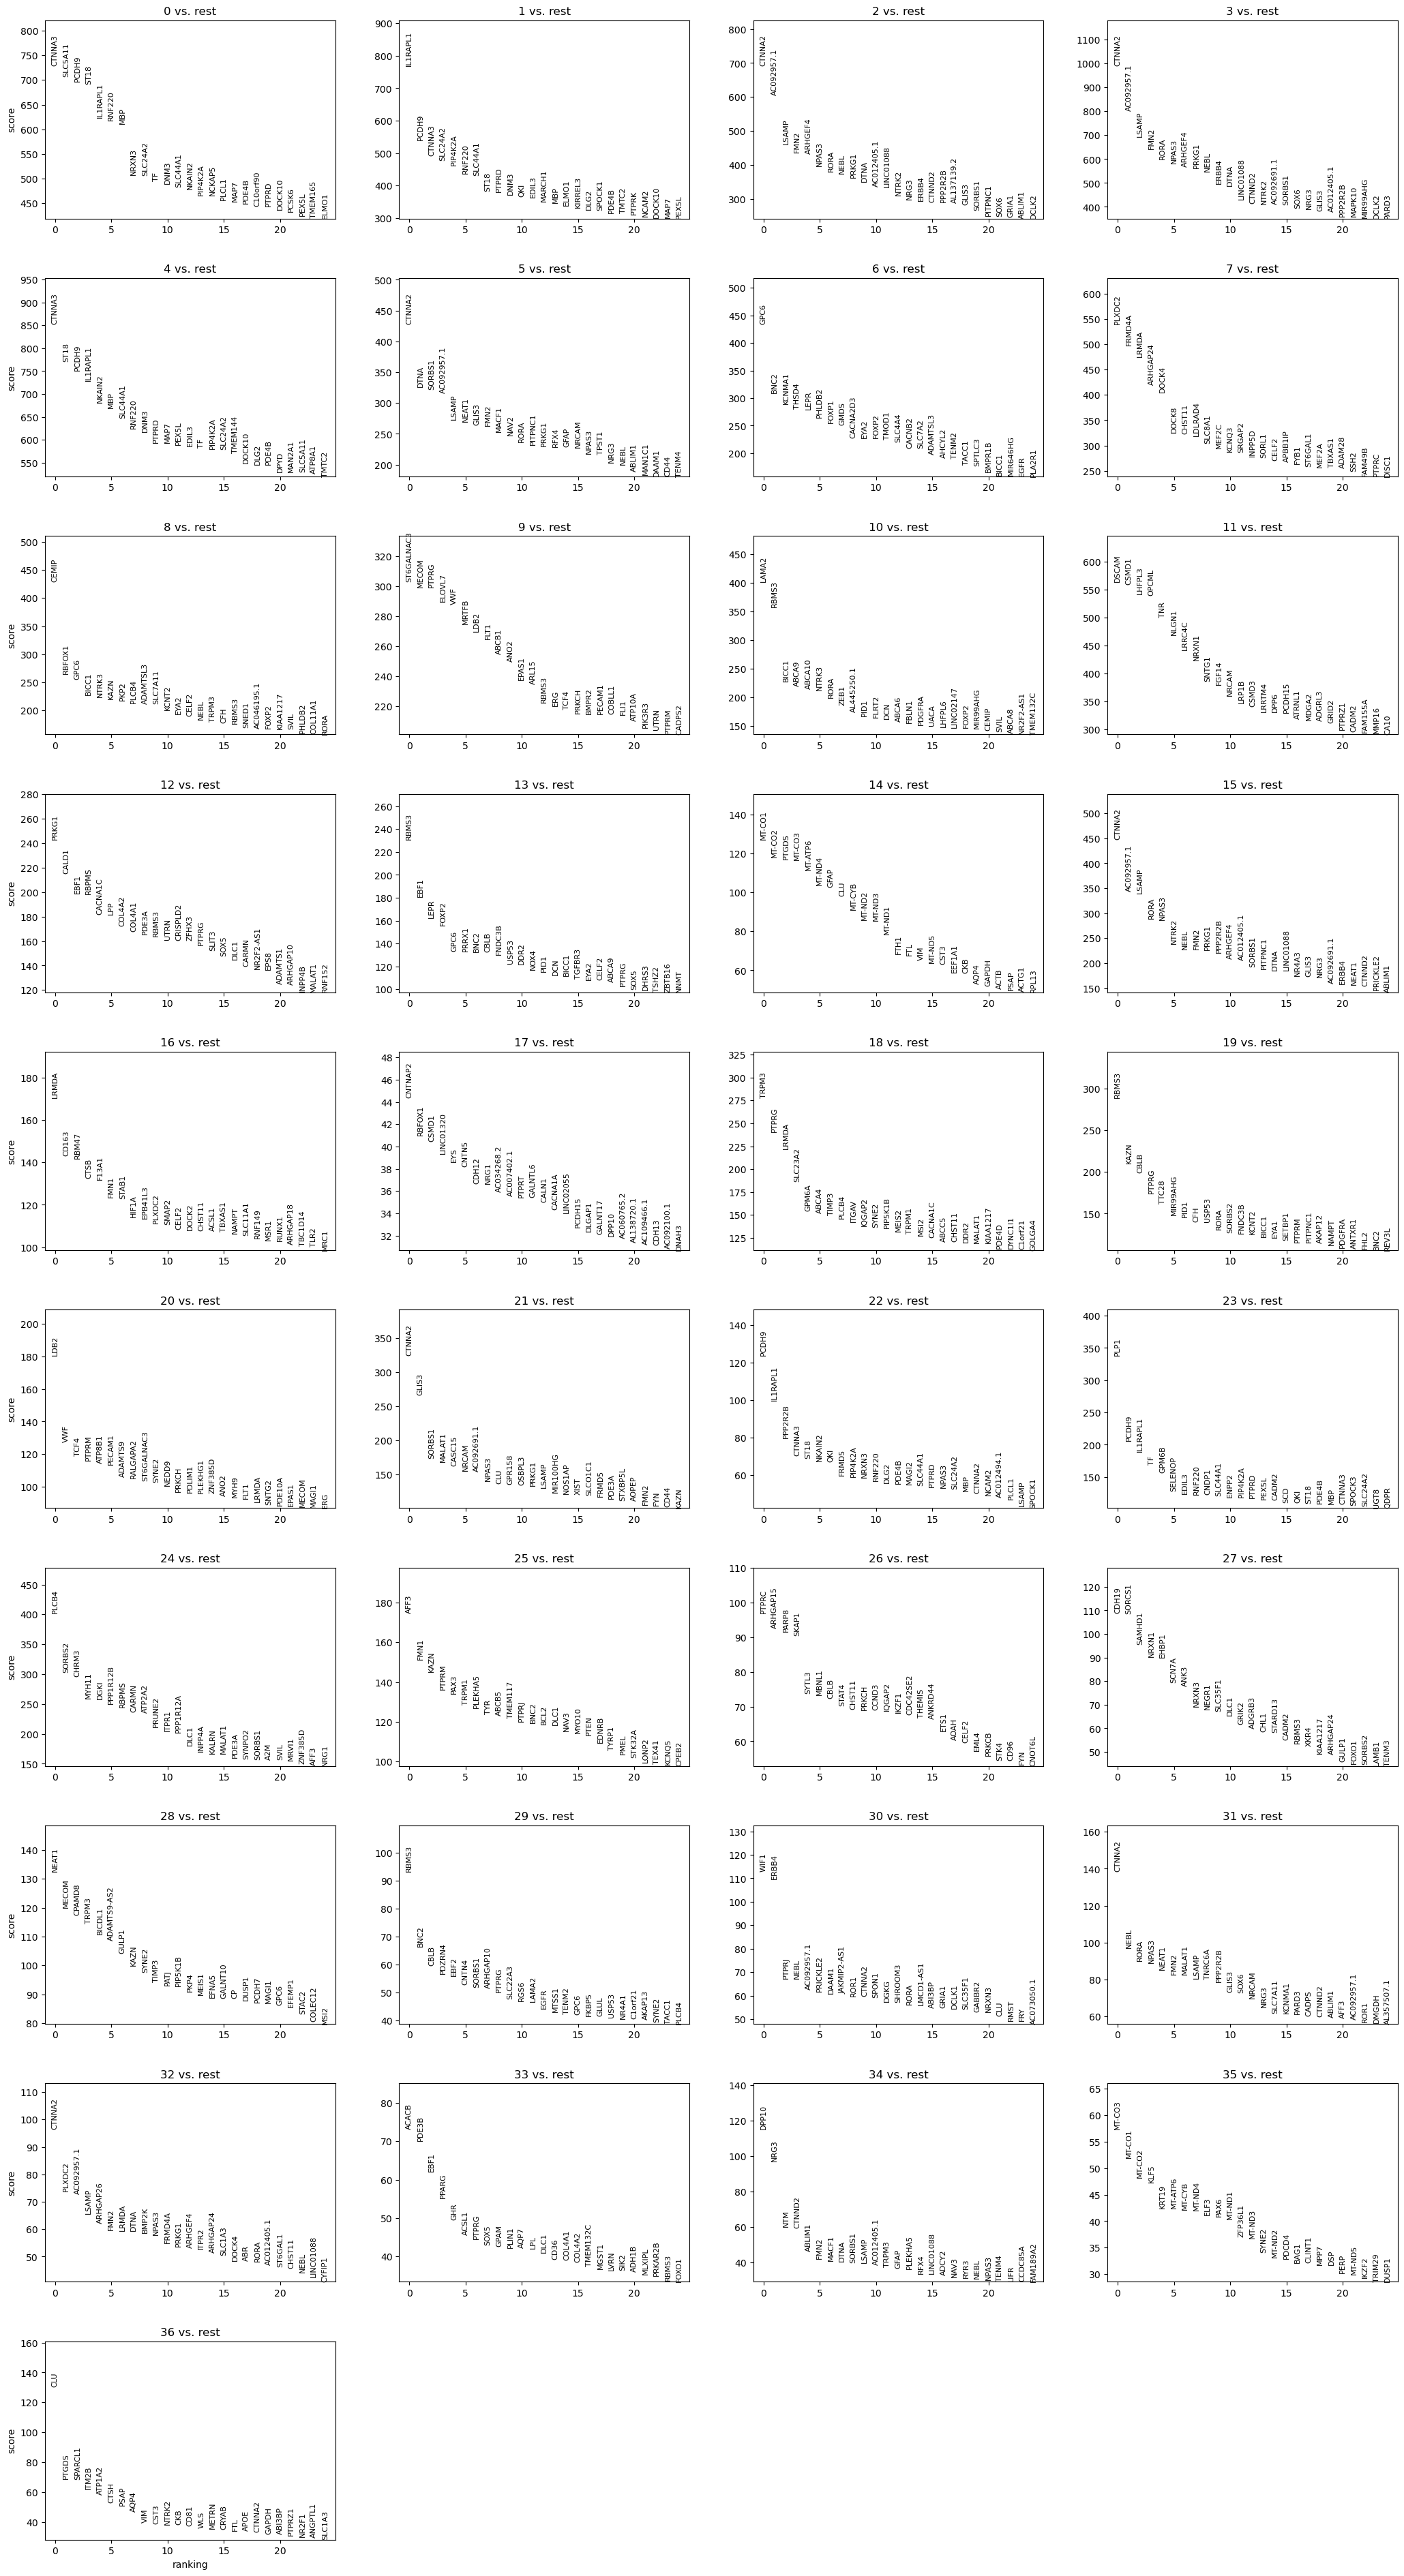

AnnData object with n_obs × n_vars = 555545 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'DF.classifications', 'donor', 'age', 'gender', 'Postmortem time (hr)', 'ethnicity', 'sampleid', 'leiden', 'annotate', 'group'
    uns: 'annotate_colors', 'gender_colors', 'ethnicity_colors', 't-test', 'log1p'
    obsm: 'X_scVI', 'X_umap'

In [40]:
##proceed with deg analysis
sc.tl.rank_genes_groups(on, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(on, n_genes=25, sharey=False, key = "t-test")

# results are stored in the adata.uns["t-test"] slot
on

In [ ]:
## T-test overestimated_variance
sc.tl.rank_genes_groups(on, 'leiden', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(on, n_genes=25, sharey=False, key = "t-test_ov")

In [ ]:
### DEG analysis retrieved from https://nbisweden.github.io/workshop-scRNAseq/labs/scanpy/scanpy_05_dge.html
